In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import numpy.linalg as la
import math
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Sets up the basic class for creating the objects in the solar system
class makeplanet:
    
    #This will create the planet and assign the necessary elements to each planet (i.e. Name, Mass, Position, Velocity)
    def __init__(self,name, mass, x,y,z,vx,vy,vz):
        self.name = name
        self.mass = mass
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz

In [14]:
'''
These next two functions will conveniently remove the velocity and position of the planet in the form of a 1D that
can be iterated over and indexed and all of the nice things that we like to do with arrays.
'''
def position(planet):
    return [planet.x, planet.y, planet.z]
    
def velocity(planet):
    return [planet.vx, planet.vy, planet.vz]

def r(planet):
    return (planet.x**2+ planet.y**2+ planet.z**2)**(0.5)

def rbetween(planet1, planet2):
    return ((planet1.x-planet2.x)**2+ (planet1.y-planet2.y)**2+ (planet1.z-planets2.z)**2)**(0.5)

In [4]:
sun = makeplanet("Sun", 1.00, 0.0,0.0,0.0,0.0,0.0,0.0)

The following few cells will be a test of the makeplanet class. I will test the ability of the class to extrapolate the velocity and position of the planet as well as the mass. These are important.

In [5]:
position(sun)

[0.0, 0.0, 0.0]

In [6]:
velocity(sun)

[0.0, 0.0, 0.0]

In [7]:
sun.mass

1.0

The functions work. I will now add the Earth. The masses will be entered as ratios of the mass of the sun. The position units will be in AU, and the velocities will be in AU per day, so we will multiply the velocities by 365 to put them in units of AU-yr.

In [8]:
earth = makeplanet("Earth", 3E-6, -9.88E-01, 8.50E-02, -1.52E-04, 365*-1.68E-03, 365*-1.71E-02, 365*4.35E-07) 

In [9]:
position(earth)

[-0.988, 0.085, -0.000152]

In [10]:
velocity(earth)

[-0.6132000000000001, -6.2415, 0.000158775]

In [11]:
r(earth)

0.9916496473573719

One more thing I want to do before we going to far into things is to make a function that will make 3D Plots for me given some input of x values, y values, and z values.

In [12]:
def plotter(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y,z,s=5)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

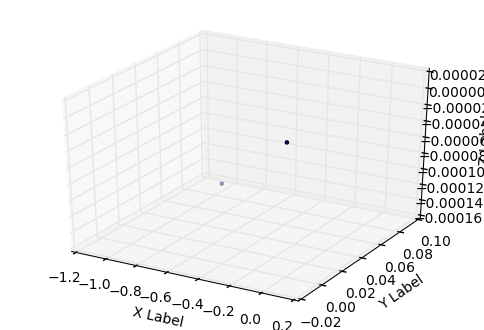

In [13]:
plotter([position(sun)[0],position(earth)[0]],[position(sun)[1],position(earth)[1]],[position(sun)[2],position(earth)[2]])

This is a simple plot of the Earth and the Sun in their respective initial positions.

Now, to figure out our algorithms to do things. (Earth Sun System)

In [41]:
def coorx(xi, h,vxi, axi):
    return xi + h*vxi+h**2*axi/2

def velx(vxi, h, ax_i_1,ax_i):
    return vxi + (h/2)*(ax_i_1+ax_i)

def accx(coor, dist):
    return -4*math.pi**2*coor/(dist**3)


time = 1 #The number of years we want to loop over
h = 1/365 #The step size, defined as one day
n = int(time/h) #The total numbers of iterations

coordinatesx = np.zeros(n+1)
velocitiesx = np.zeros(n+1)

coordinatesx[0] = earth.x
velocitiesx[0] = earth.vx
rad = r(earth)

for i in range(n):
    x_i = coordinatesx[i]
    vx_i = velocitiesx[i]
    ax_i = accx(x_i, rad)
    x_i_1 = coorx(x_i, h,vx_i,ax_i)
    coordinatesx[i+1] = x_i_1
    ax_i_1 = accx(x_i_1, rad)
    vx_i_1 = velx(vx_i,h,ax_i_1,ax_i)
    velocitiesx[i+1] = vx_i_1
#coordinatesx

In [42]:
def coory(yi, h,vyi, ayi):
    return yi + h*vyi+h**2*ayi/2

def vely(vyi, h, ay_i_1,ay_i):
    return vyi + (h/2)*(ay_i_1+ay_i)

def accy(coor, dist):
    return -4*math.pi**2*coor/(dist**3)


time = 1 #The number of years we want to loop over
h = 1/365 #The step size, defined as one day
n = int(time/h) #The total numbers of iterations

coordinatesy = np.zeros(n+1)
velocitiesy = np.zeros(n+1)

coordinatesy[0] = earth.y
velocitiesy[0] = earth.vy
rad = r(earth)

for i in range(n):
    y_i = coordinatesy[i]
    vy_i = velocitiesy[i]
    ay_i = accy(y_i, rad)
    y_i_1 = coory(y_i, h,vy_i,ay_i)
    coordinatesy[i+1] = y_i_1
    ay_i_1 = accy(y_i_1, rad)
    vy_i_1 = vely(vy_i,h,ay_i_1,ay_i)
    velocitiesy[i+1] = vy_i_1
#coordinatesy

In [44]:
def coorz(zi, h,vzi, azi):
    return zi + h*vzi+h**2*azi/2

def velz(vzi, h, az_i_1,az_i):
    return vzi + (h/2)*(az_i_1+az_i)

def accz(coor, dist):
    return -4*math.pi**2*coor/(dist**3)


time = 1 #The number of years we want to loop over
h = 1/365 #The step size, defined as one day
n = int(time/h) #The total numbers of iterations

coordinatesz = np.zeros(n+1)
velocitiesz = np.zeros(n+1)

coordinatesz[0] = earth.z
velocitiesz[0] = earth.vz
rad = r(earth)

for i in range(n):
    z_i = coordinatesz[i]
    vz_i = velocitiesz[i]
    az_i = accz(z_i, rad)
    z_i_1 = coorz(z_i, h,vz_i,az_i)
    coordinatesz[i+1] = z_i_1
    az_i_1 = accz(z_i_1, rad)
    vz_i_1 = velz(vz_i,h,az_i_1,az_i)
    velocitiesz[i+1] = vz_i_1
#coordinatesz

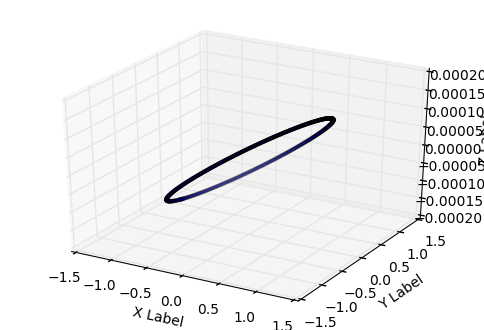

In [45]:
plotter(coordinatesx, coordinatesy, coordinatesz)

We now have a program that will show the plot of the Earth and the Sun interaction. The next step is to put all of our functions into one class and then use that to include additional planets. We will start by adding Jupiter.